# Traffic Signs Recognition using CNN & Keras

Our approach to building this traffic sign classification model is discussed in four steps:

- Explore the dataset
- Build a CNN model
- Train and validate the model
- Test the model with test dataset

## Import required libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os 
os.chdir('D:/Traffic_Sign_Recognition')
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

# The Dataset of Python Project

For this project, we are using the public dataset available at Kaggle:

[Traffic Signs Dataset](https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/code)

The dataset contains more than 50,000 images of different traffic signs. It is further classified into 43 different classes. The dataset is quite varying, some of the classes have many images while some classes have few images. The size of the dataset is around 300 MB. The dataset has a train folder which contains images inside each class and a test folder which we will use for testing our model.

## Store data, labels in the list

In [2]:
#loading 
data = []
labels = []
# We have 43 Classes
classes = 43
cur_path = os.getcwd()

In [3]:
cur_path

'D:\\Traffic_Sign_Recognition'

## Preprocess the images

In [14]:

import numpy as np
import cv2
import glob



def load_data(num_classes):
    
    dir_loc_List = []
    labels = []
    
    # creating directory list to read data from each class folder
    for class_Number in range(0, num_classes):
        if class_Number < 10:
            dir_loc_List.append('GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/0000' + str(class_Number) + '/*.ppm')
            labels.append(str(class_Number))
        else:
            dir_loc_List.append('GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/000' + str(class_Number) + '/*.ppm')
            labels.append(str(class_Number))

    class_counter = 0
    for dir_loc in dir_loc_List:
        
        # reading from each class directory folder
        if class_counter == 0:
            filelist = glob.glob(dir_loc)
            data_GTSRB = np.array([cv2.imread(fname) for fname in filelist])
            data_class = np.full((len(data_GTSRB), 1), class_counter)
            class_counter += 1
        else:
            filelist = glob.glob(dir_loc)
            data_GTSRB = np.concatenate((data_GTSRB, np.array([cv2.imread(fname) for fname in filelist])))
            data_class = np.concatenate((data_class, (np.full((len(np.array([cv2.imread(fname) for fname in filelist])), 1), class_counter))))
            class_counter += 1

    return data_GTSRB, data_class, labels



def gray_convrt(input_data):

    # converting input images to grayscale
    data_gray = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in input_data])

    return data_gray



def avg_size(x_data):
    
    size_List = []
    for data in x_data:
        # get the minimum pixel length (images are not squares)
        size_List.append(min(data.shape))
    
    return int(np.average(size_List))



def resize_all(input_data, size = (50, 50)):

    # resizing input images
    data_resized = np.array([cv2.resize(img, size) for img in input_data])

    return data_resized



def clf_reshape(input_data):
    
    # image flattening, reshaping the data to the (samples, feature) matrix format
    n_samples = len(input_data)
    data_reshaped = input_data.reshape((n_samples, -1))
    
    return data_reshaped



def canny_edge_convrt(input_data):

    # converting input images to edge detected images
    data_edge = np.array([cv2.Canny(img, 100, 200) for img in input_data])
    
    return data_edge


    
def under_sample(x_data, y_data):

    # obtaining class labels and their counts
    labels_arr, class_count = np.unique(y_data, return_counts = True)

    counter = 0
    
    # for each class label, performing random under-sampling using the indices
    for cls in labels_arr:
        get_indexes = lambda x, xs: [i for (y, i) in zip(xs, range(len(xs))) if x == y]
        cls_idx = get_indexes(cls, y_data)
        
        # obtaining all image instances for the class label "cls"
        reshaped_subset = x_data[cls_idx]
        class_subset = y_data[cls_idx]
        
        # obtaining the indices for the purpose of random sampling without replacement
        idx = np.random.choice(np.arange(len(reshaped_subset)), min(class_count), replace = False)
        
        if counter == 0:
            # applying the randomly sampled indices on the subsets
            x_und_smpl_data = reshaped_subset[idx]
            y_und_smpl_data = class_subset[idx]
            counter += 1
        else:
            # applying the randomly sampled indices on the subsets
            x_und_smpl_data = np.concatenate((x_und_smpl_data, reshaped_subset[idx]))
            y_und_smpl_data = np.concatenate((y_und_smpl_data, class_subset[idx]))
            counter += 1

    return x_und_smpl_data, y_und_smpl_data



SyntaxError: invalid syntax (1464674146.py, line 120)

In [4]:
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

cannot identify image file 'D:\\Traffic_Sign_Recognition\\train\\0\\archive - Shortcut.lnk'


## Converting lists into numpy arrays

In [13]:
data = np.array(x_data)
labels = np.array(labels)

NameError: name 'x_data' is not defined

## Save Labels & Data for future use

In [6]:
# os.mkdir('training')

np.save('./training/data',data)
np.save('./training/target',labels)

## Load data & Labels

In [7]:
data=np.load('./training/data.npy')
labels=np.load('./training/target.npy')

In [8]:
print(data.shape, labels.shape)

(0,) (0,)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [12]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

NameError: name 'X_train' is not defined

## Convert labels to onehot encoding

In [11]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

# Show Datasets in CSV Formet

In [12]:
train_data=pd.read_csv('D:\Traffic_Sign_Recognition\\Train.csv',usecols=['ClassId','Path','Width','Height'],)
test_data=pd.read_csv('D:\Traffic_Sign_Recognition\\Test.csv',usecols=['ClassId','Path','Width','Height'],)

train_data.rename({'ClassId':'label','Path':'path'},inplace=True,axis=1)
test_data.rename({'ClassId':'label','Path':'path'},inplace=True,axis=1)

train_data.head()




,Width,Height,label,path
0,27,26,20,Train/20/00020_00000_00000.png
1,28,27,20,Train/20/00020_00000_00001.png
2,29,26,20,Train/20/00020_00000_00002.png
3,28,27,20,Train/20/00020_00000_00003.png
4,28,26,20,Train/20/00020_00000_00004.png


In [13]:
test_data.head()



,Width,Height,label,path
0,53,54,16,Test/00000.png
1,42,45,1,Test/00001.png
2,48,52,38,Test/00002.png
3,27,29,33,Test/00003.png
4,60,57,11,Test/00004.png


In [14]:
print('NO. of classes')
print(train_data['label'].nunique())

NO. of classes
43


# Let's Visualize the testing Data

C:\Users\MSI\AppData\Local\Temp\ipykernel_15820\2168138401.py:12: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


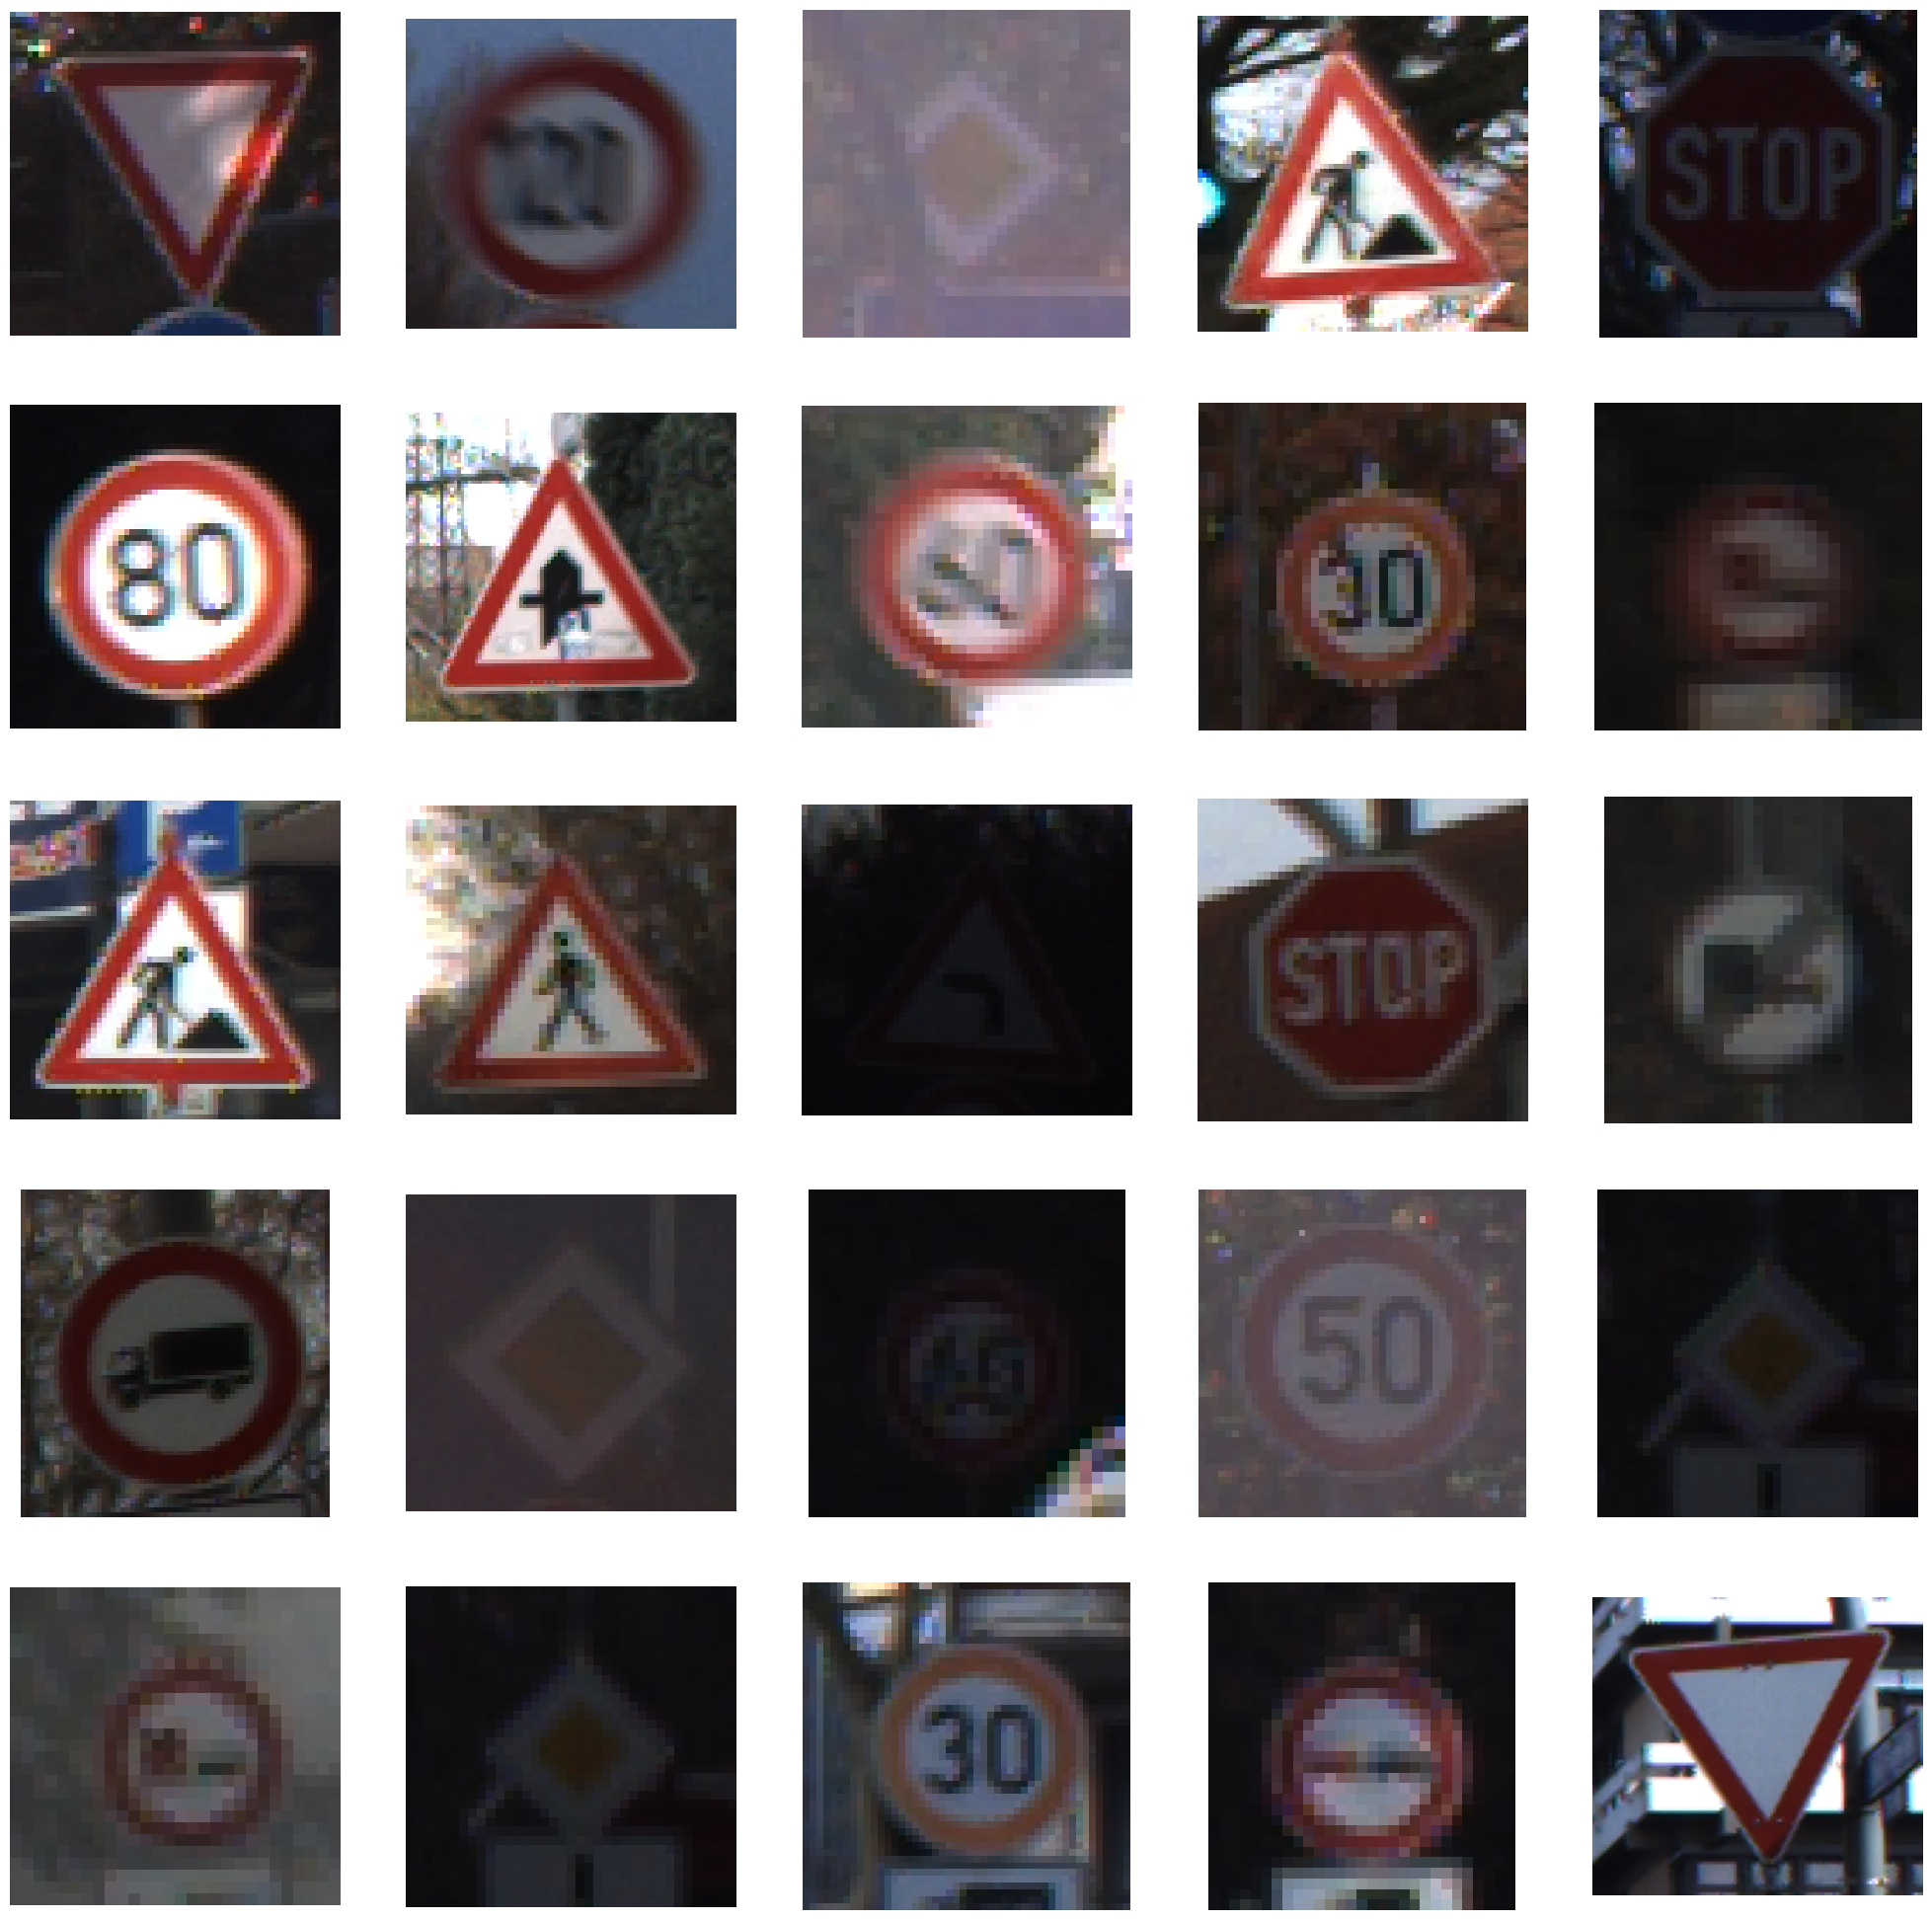

In [15]:
import random
from matplotlib.image import imread
data_dir= os.getcwd()
imgs=test_data['path'].values
plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_image_path=data_dir+'/'+random.choice(imgs)
    random_image=imread(random_image_path)
    plt.imshow(random_image)
    plt.grid(b=None)
    plt.axis('off')
    plt.xlabel(random_image.shape[0],fontsize=20)
    plt.ylabel(random_image.shape[0],fontsize=20)
    
    


In [16]:
os.chdir(r"D:\Traffic_Sign_Recognition\Train")
cur_path = os.getcwd()
print(cur_path)

D:\Traffic_Sign_Recognition\Train


# Let's Visualize the Training Datasets in Sorted grids format

D:\Traffic_Sign_Recognition\Train


Text(0, 0.5, 'Number of images')

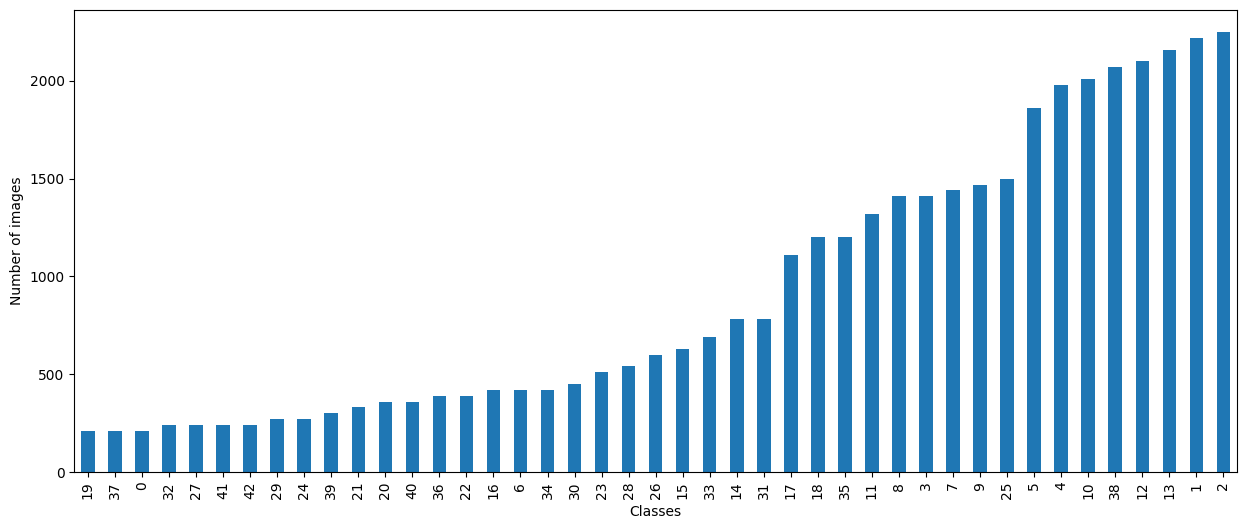

In [54]:
# number of images in each class
os.chdir(r"D:\\Traffic_Sign_Recognition\\Train")
cur_path = os.getcwd()
print(cur_path)
import pandas as pd 
import matplotlib.pyplot as plt
data_dic = {}
for folder in os.listdir(cur_path):
    data_dic[folder] = len(os.listdir(cur_path + '/' + folder))

data_df= pd.Series(data_dic)
plt.figure(figsize = (15, 6))
data_df.sort_values().plot(kind = 'bar')
plt.xlabel('Classes')
plt.ylabel('Number of images')

## Now it's time to build the model

In [22]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        2432      
                                                                 
 conv2d_3 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 64)          36928     
                                                      

CNN MODEL VIEW  :-

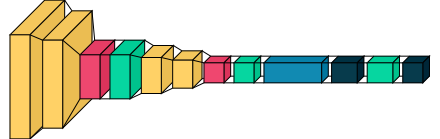

In [25]:
import visualkeras
visualkeras.layered_view(model)

In [26]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
epochs = 30
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/30
981/981 [==============================] - 108s 108ms/step - loss: 1.8292 - accuracy: 0.5479 - val_loss: 0.3453 - val_accuracy: 0.9114
Epoch 2/30
981/981 [==============================] - 108s 110ms/step - loss: 0.5366 - accuracy: 0.8446 - val_loss: 0.1543 - val_accuracy: 0.9587
Epoch 3/30
981/981 [==============================] - 116s 118ms/step - loss: 0.3410 - accuracy: 0.9043 - val_loss: 0.1188 - val_accuracy: 0.9676
Epoch 4/30
981/981 [==============================] - 117s 119ms/step - loss: 0.2875 - accuracy: 0.9186 - val_loss: 0.0888 - val_accuracy: 0.9755
Epoch 5/30
981/981 [==============================] - 116s 118ms/step - loss: 0.2565 - accuracy: 0.9275 - val_loss: 0.0682 - val_accuracy: 0.9807
Epoch 6/30
981/981 [==============================] - 115s 117ms/step - loss: 0.2227 - accuracy: 0.9398 - val_loss: 0.0889 - val_accuracy: 0.9759
Epoch 7/30
981/981 [==============================] - 112s 114ms/step - loss: 0.2219 - accuracy: 0.9393 - val_loss: 0.0711 -

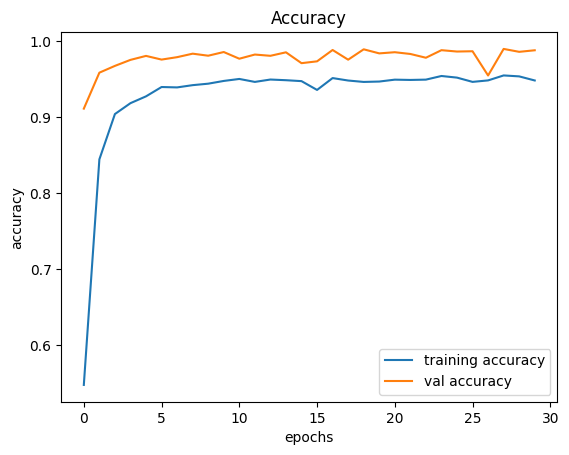

In [28]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

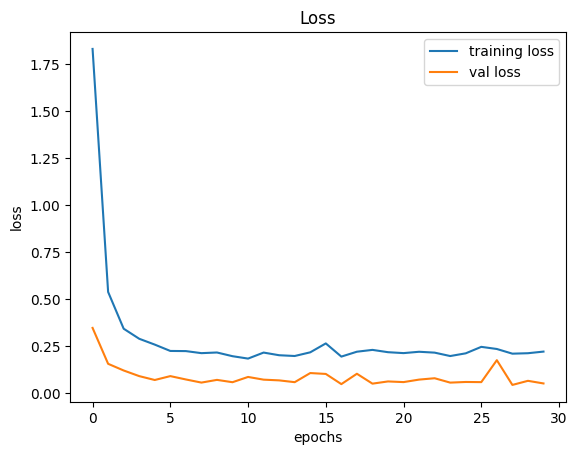

In [29]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Evalution


In [30]:
# Score
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss', score[0]*100)
print('Test accuracy', score[1]*100)

Test Loss 4.988387227058411
Test accuracy 98.81407618522644


In [31]:
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

246/246 [==============================] - 9s 31ms/step


In [32]:

from sklearn.metrics import classification_report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        41
           1       0.98      0.98      0.98       439
           2       0.97      0.99      0.98       451
           3       1.00      0.98      0.99       276
           4       1.00      0.99      0.99       402
           5       0.96      0.97      0.97       375
           6       1.00      1.00      1.00        88
           7       0.99      0.98      0.98       297
           8       0.99      0.98      0.99       263
           9       1.00      0.99      0.99       281
          10       0.99      1.00      0.99       391
          11       0.99      0.97      0.98       280
          12       1.00      0.99      1.00       409
          13       1.00      1.00      1.00       430
          14       1.00      0.98      0.99       166
          15       0.98      0.99      0.99       117
          16       1.00      1.00      1.00        91
          17       0.99    

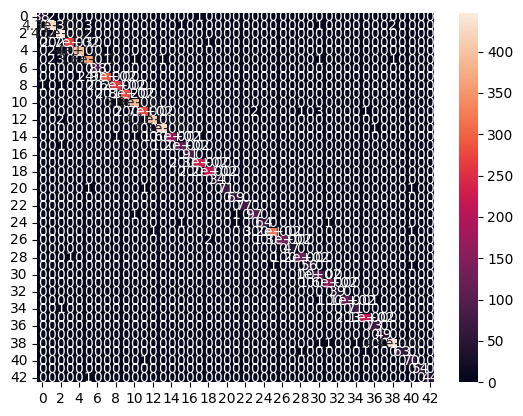

In [33]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_class, y_pred_class)
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.savefig('h1.png')

In [55]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred_class,y_test_class)
score *100

98.814078041316

In [35]:
model.save('traffic_classifier.h5')

## LEt's do testing on Test data

In [36]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [37]:
TEST = os.chdir(r'D:\\Traffic_Sign_Recognition')
X_test,label = testing('Test.csv')

In [38]:
Y_pred = model.predict(X_test)
Y_pred

395/395 [==============================] - 9s 22ms/step


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.3215778e-15, 1.0000000e+00, 2.3929631e-14, ..., 1.8946430e-30,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [2.2058732e-07, 1.0312056e-01, 5.7650959e-01, ..., 2.3448789e-03,
        3.2670985e-10, 1.4148698e-07],
       [1.6785119e-13, 4.5389901e-09, 1.5561332e-11, ..., 2.2702049e-12,
        2.2237386e-36, 7.0554674e-22],
       [2.6026531e-13, 6.4959291e-09, 1.1799010e-08, ..., 5.7497775e-08,
        6.8433745e-16, 1.2971801e-13]], dtype=float32)

## Accuracy with the test data

In [39]:
# from sklearn.metrics import accuracy_score
# print(accuracy_score(label, Y_pred[:,0]))

## Save the model

In [40]:
model.save("./training/TSR.h5")

## Load the Model

In [41]:
import os
os.chdir(r'D:\\Traffic_Sign_Recognition')
from keras.models import load_model
model = load_model('training/TSR.h5')

In [42]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [43]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = model.predict(X_test)
    return image,Y_pred

PREDICTING:- 

1/1 [==============================] - 0s 86ms/step
Predicted traffic sign is:  Speed limit (30km/h)


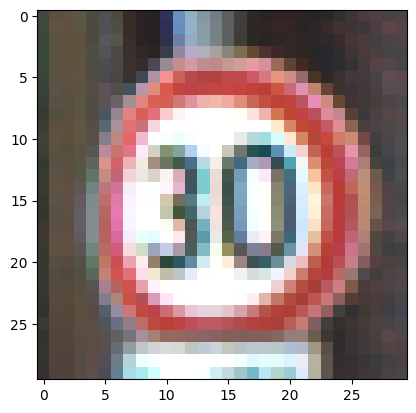

In [57]:
plot,prediction = test_on_img(r'D:\\Traffic_Sign_Recognition\\Test\\01001.png')
s = [str(i).strip().replace("\n","") for i in prediction][0][1:-1]
s=[float(b) for b in s.split(" ")]
a=[index for index, num in enumerate(s) if (num == max(s))]
# print(type(a),type(a[0]), a) 
# print(type(s),type(s[0]), s) 
# a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a[0]])
plt.imshow(plot)
plt.show()